# Predicting a Soccer Player's Work Rate

The "work rate" of a soccer player is a measure of how much they contribute when not in possession of the ball. A player can have a "Low", "Medium", or "High" rating. The work rate is further split into "Attacking Work Rate" when the team is on offense and "Defensive Work Rate" when the team is on defense.

In the FIFA video game, work rate is an important attribute. Players are also rated based on many other factors like their ability to dribble, pass, score etc. I downloaded data from [this Kaggle page](https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global/version/5#) which contains this skill data from FIFA players, including the work rate. I removed most of the skill ratings and kept ones that I thought may contribute to work rate. We'll see if we can predict attacking work rate based on other skills.

I should note, I took the top 195 players, then removed the 5 that had a "Low" work rate. So there are only two categories here, "Medium" and "High".

In [1]:
import pandas as pd

fifa = pd.read_csv('FIFA_Data/FIFA_WorkRate_Analysis_195.csv',delimiter='\t')

fifa.head()

,Attacking_Work_Rate,Marking,Aggression,Reactions,Speed,Stamina
0,High,22,63,96,92,92
1,Medium,13,48,95,87,74
2,High,21,56,88,90,79
3,High,30,78,93,77,89
4,Medium,10,29,85,61,44


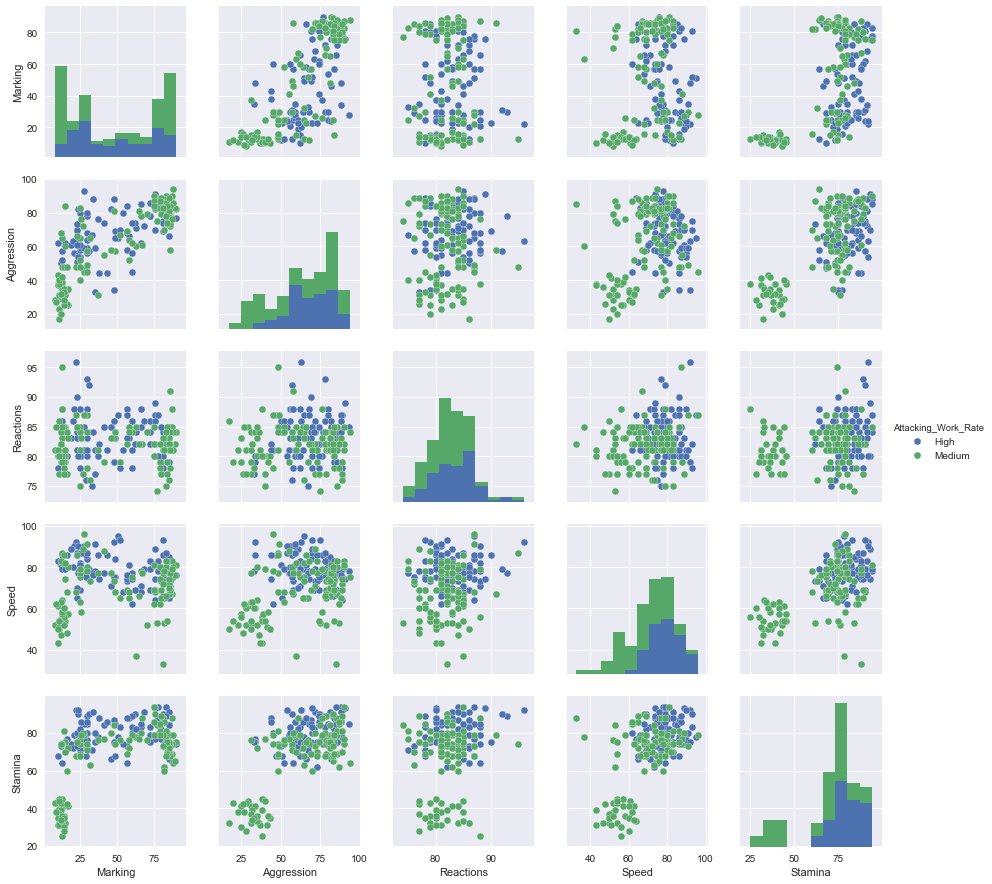

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()

sns.pairplot(fifa,hue='Attacking_Work_Rate');

In [3]:
fifa.drop?

In [5]:
fifa.drop(['Marking','Reactions'],inplace=True,axis=1)

In [6]:
fifa.head()

,Attacking_Work_Rate,Aggression,Speed,Stamina
0,High,63,92,92
1,Medium,48,87,74
2,High,56,90,79
3,High,78,77,89
4,Medium,29,61,44


In [17]:
X = fifa.iloc[:,[1,2,3]]
y = fifa.iloc[:,0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
from sklearn.svm import SVC

fifa_svm = SVC(kernel='linear', C=1.0, random_state=0)

In [20]:
fifa_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
y_pred = fifa_svm.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.7966101694915254


In [25]:
from PlotDecision import plot_decision_regions
import numpy as np
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=fifa_svm, test_idx=range(105, 150))

ValueError: X.shape[1] = 2 should be equal to 3, the number of features at training time